# Temperature Analysis 2: Bonus

In [1]:
# Import dependencies for matplotlib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Import other dependencies
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Import SQL Alchemy dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# Create the engine to the Hawaii SQLite Database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Create a base and prepare the base
Base = automap_base()
Base.prepare(engine, reflect = True)

In [6]:
# See the classes in the database
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save a reference to the tables
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Start a session
session = Session(engine)

In [9]:
# Function from provided starter code:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVG, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

In [10]:
# Find temperature between two dates
#temperature_stats = calc_temps('2017-08-01', '2017-08-07')
#print(temperature_stats)

## Temperature Statistics:

In [11]:
# Input from user
print("Let's find temperature statistics for a range of dates!")
print("Input dates in the format YYYY-mm-dd")
start_date = input("What date would you like to start with? ")
end_date = input("What date would you like to end with? ")

temperature_stats = calc_temps(start_date, end_date)

Let's find temperature statistics for a range of dates!
Input dates in the format YYYY-mm-dd
What date would you like to start with? 2016-06-18
What date would you like to end with? 2016-06-23


In [12]:
# Convert tuple to a list
temp_stats = list(np.ravel(temperature_stats))

# Create variables for the values
average_temp = temp_stats[1]
min_temp = temp_stats[0]
max_temp = temp_stats[2]

In [13]:
# Print out results
print(f"Temperature Statistics for {start_date} to {end_date}")
print(f"Minimum Temperature: {min_temp}")
print(f"Maximum Temperature: {max_temp}")
print(f"Average Temperature: {average_temp}")

Temperature Statistics for 2016-06-18 to 2016-06-23
Minimum Temperature: 71.0
Maximum Temperature: 80.0
Average Temperature: 76.075


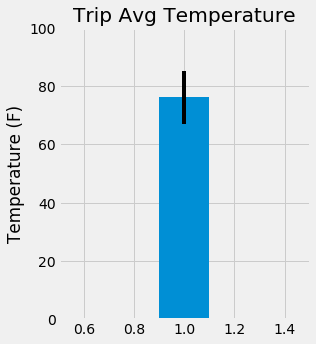

In [14]:
# Plot the average temperature
plt.figure(figsize=(4,5))
plt.bar(1,average_temp, width=0.2, align="center", yerr=(max_temp-min_temp))
plt.xlim(0.5,1.5)
plt.ylim(0,100)
plt.title("Trip Avg Temperature")
plt.ylabel("Temperature (F)")
plt.show()

In [15]:
# Create a function that will find the details of the rainfall at each station
def calc_rainfall(start_date, end_date):
    """Precipitation and Station details for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        AVG Precipitation, Station, Station Name, Latitude, Longitude, Elevation
    """
    
    return session.query(func.avg(Measurement.prcp), Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).\
        filter(Measurement.date >= start_date).filter(Station.station == Measurement.station).\
        filter(Measurement.date <= end_date).order_by(func.avg(Measurement.prcp).desc()).group_by(Station.station).all()

In [16]:
# Find the rainfall for a range of dates
rainfall = (calc_rainfall("2016-09-08", "2016-10-08"))
rainfall

[(0.9448387096774191, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 (0.26193548387096766, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (0.15041666666666664, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (0.1170967741935484, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (0.10999999999999996, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (0.06612903225806452, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (0.02428571428571429, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]

In [17]:
# Function provided from starter notebook
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
normal_temp = daily_normals("01-01")

## User-Generated:

## Daily Averages:

In [24]:
# Set the start and end date of the trip
start_date = '2017-06-01'
end_date = '2017-06-18'

In [25]:
# Use the start and end date to create a range of dates
start = dt.datetime.strptime(start_date, "%Y-%m-%d")
end = dt.datetime.strptime(end_date, "%Y-%m-%d")

# Find the number of dates in the range
num_of_dates = (end - start).days + 1

# Create a list of the dates range
dates_range = []

# Loop through and append each date to the list
# Strip off the year and save a list of strings in the format %m-%d
for x in range(num_of_dates):
    dates = start + dt.timedelta(days=x)
    dates_month_day = dt.datetime.strftime(dates, "%m-%d")
    dates_range.append(dates_month_day)
    
dates_range

['06-01',
 '06-02',
 '06-03',
 '06-04',
 '06-05',
 '06-06',
 '06-07',
 '06-08',
 '06-09',
 '06-10',
 '06-11',
 '06-12',
 '06-13',
 '06-14',
 '06-15',
 '06-16',
 '06-17',
 '06-18']

In [26]:
# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
normals = []

# Loop through and calculate the data, and append it to a list without the tuple
for x in dates_range:
    normal_temp = daily_normals(x)
    normals.append(list(np.ravel(normal_temp)))

normals

[[64.0, 74.6140350877193, 81.0],
 [65.0, 74.4, 81.0],
 [65.0, 74.03448275862068, 80.0],
 [65.0, 73.81818181818181, 81.0],
 [68.0, 74.85454545454546, 81.0],
 [70.0, 75.17543859649123, 80.0],
 [68.0, 75.07142857142857, 81.0],
 [70.0, 75.58620689655173, 81.0],
 [69.0, 75.15254237288136, 81.0],
 [68.0, 75.14285714285714, 81.0],
 [69.0, 76.01960784313725, 84.0],
 [66.0, 75.66666666666667, 83.0],
 [68.0, 75.66666666666667, 81.0],
 [69.0, 75.62711864406779, 81.0],
 [67.0, 75.40350877192982, 81.0],
 [69.0, 75.41379310344827, 81.0],
 [68.0, 74.59322033898304, 81.0],
 [69.0, 74.60344827586206, 80.0]]

In [27]:
# Create a dataframe of temperature averages
df = pd.DataFrame(normals, columns=["min", "avg", "max"])
df_date = pd.DataFrame(dates_range, columns=["date"])
df_merged = pd.concat([df, df_date], axis=1)

df_merged.set_index("date")

,min,avg,max
date,,,
06-01,64.0,74.614035,81.0
06-02,65.0,74.400000,81.0
06-03,65.0,74.034483,80.0
06-04,65.0,73.818182,81.0
06-05,68.0,74.854545,81.0
06-06,70.0,75.175439,80.0
06-07,68.0,75.071429,81.0
06-08,70.0,75.586207,81.0
06-09,69.0,75.152542,81.0


In [34]:
# Create a list for the xtick positions
x = [x for x in range(num_of_dates)]

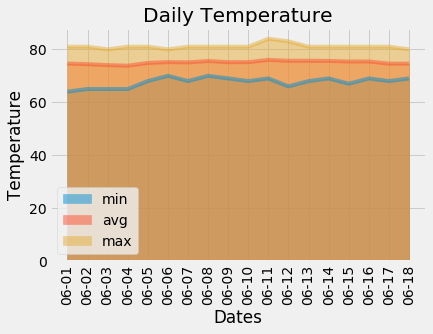

In [35]:
# Create an area plot to show the daily temperatures
df_merged.plot.area(stacked=False)
plt.xticks(x, dates_range, rotation="vertical")
plt.title("Daily Temperature")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.show()

In [36]:
# Close the session 
session.close()